 ** <font size="10">  An Introduction to Nuclear Physics  </font>  **
 
 ** <font size="6"> Chapter I: nuclear massess and binding energies  </font>**

by *Dr. Jiangming Yao*, 

[Nuclear theory and nuclear astrophysics group](https://jmyao17.github.io/ntg-phy/index.html),

School of Physics and Astronomy, Sun Yat-sen University

# Basic formulas

- Nuclear (atomic) mass:

$$
M(Z,A) = ZM_H + (A-Z)M_n,\quad M_H\approx M_p + m_e
$$

- Nuclear (atomic) mass excess:

$$
\Delta M(Z,A) = M(Z,A) - A m_u,
$$
where $m_u$ is defined based on the mass of $^{12}$C,

$$
m_u = M(Z=6, A=12)/12 = 931.493856 {\rm MeV}.
$$

- Nuclear binding energy:

$$
B(Z, A) = Z M_H +  (A-Z)M_n - M(Z, A)
$$

# Numerical calculation for $^{16}$O

In [1]:
mass_excess_O16=-4.737 # MeV

BE_12C=7.680144*12 # MeV

M_H = 938.272+0.511 # MeV
M_p = 938.272 # MeV
M_n = 939.565 # MeV

In [2]:
# atomic mass for 12C
Mass_12C = 6*M_H+6*M_n - BE_12C

# 1 u
Unit=Mass_12C/12 

print("Atomic Mass for 12C: {} [MeV]".format(Mass_12C))
print("1 u : {} [MeV]".format(Unit))

print("Mass excess for 12C : {} [MeV]".format(Mass_12C-12*Unit))

Atomic Mass for 12C: 11177.926272 [MeV]
1 u : 931.493856 [MeV]
Mass excess for 12C : 0.0 [MeV]


In [3]:
# atomic mass for 16O

Mass_16O = Unit * 16 + mass_excess_O16

print("Atomic Mass for 16O: {} [MeV]".format(Mass_16O))

Atomic Mass for 16O: 14899.164696000002 [MeV]


In [4]:
# binding energy for 16O

BE_16O = 8*M_H+8*M_n - Mass_16O

print("Binding Energy for 16O: {} [MeV]".format(BE_16O))
print("E/A for 16O: {} [MeV]".format(BE_16O/16))

Binding Energy for 16O: 127.61930399999801 [MeV]
E/A for 16O: 7.976206499999876 [MeV]


# Binding energies

In [8]:
import pandas as pd

import matplotlib.pyplot as plt

In [11]:
df=pd.read_csv('./dataset/AME2003.DAT',sep='\s+',skiprows=None)
df.columns=['A','Z','Mass_excess']

In [12]:
df.head()

A  Z  Mass_excess
0   9  6     28.91050
1  10  6     15.69870
2  11  6     10.65030
3  12  6      0.00000
4  13  6      3.12501

In [13]:
df['N']=df['A']-df['Z']

In [14]:
df['BE']=df['Z']*M_H+df['N']*M_n - (Unit * df['A']  + df['Mass_excess'])

In [15]:
df.head(30)

A  Z  Mass_excess   N          BE
0    9  6     28.91050   3   39.037796
1   10  6     15.69870   4   60.320740
2   11  6     10.65030   5   73.440284
3   12  6      0.00000   6   92.161728
4   13  6      3.12501   7   97.107862
5   14  6      3.01989   8  105.284126
6   15  6      9.87310   9  106.502060
7   16  6     13.69400  10  110.752304
8   17  6     21.03900  11  111.478448
9   18  6     24.93000  12  115.658592
..  .. ..          ...  ..         ...
20  18  7     13.11400  11  126.692592
21  19  7     15.86200  12  132.015736
22  20  7     21.77000  13  134.178880
23  21  7     25.25000  14  138.770024
24  22  7     32.04000  15  140.051168
25  12  8     32.04800   4   58.549728
26  13  8     23.11200   5   75.556872
27  14  8      8.00736   6   98.732656
28  15  8      2.85560   7  111.955560
29  16  8     -4.73700   8  127.619304

[30 rows x 5 columns]

Text(0.5,0,'Mass number A')

Text(0,0.5,'E/A [MeV]')

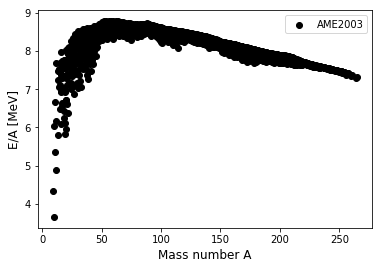

In [16]:
plt.scatter(df['A'],df['BE']/df['A'],c='k')
plt.xlabel('Mass number A',fontsize=12)
plt.ylabel('E/A [MeV]',fontsize=12)
plt.legend(['AME2003'])

**References**:

- NNDC: https://www.nndc.bnl.gov/nudat2/chartNuc.jsp 
- AME2003: A.H.Wapstra, G.Audi, C. Thibault, [Nuclear Physics A729, 129-336 (2003)](https://www.sciencedirect.com/science/article/pii/S0375947403018086)

- NUBASE2016: [Chinese Physics C Vol. 41, No. 3 (2017) 030001](http://cpc.ihep.ac.cn/article/2017/3)
  